# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_test, y_test = test['features'], test['labels']

In [2]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(x_train)

# TODO: number of testing examples
n_test = len(x_test)

# TODO: what's the shape of an image?
height, width, channels = x_train[0].shape
image_shape = height * width

# TODO: how many classes are in the dataset
classes = set(y_train)
n_classes = len(classes)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = 1024
Number of classes = 43


In [2]:
### Imports
import data_exploration
import local_sign_pickler
import project_2_lenet

Loading training_file="train.p"
Loading testing_file="test.p"


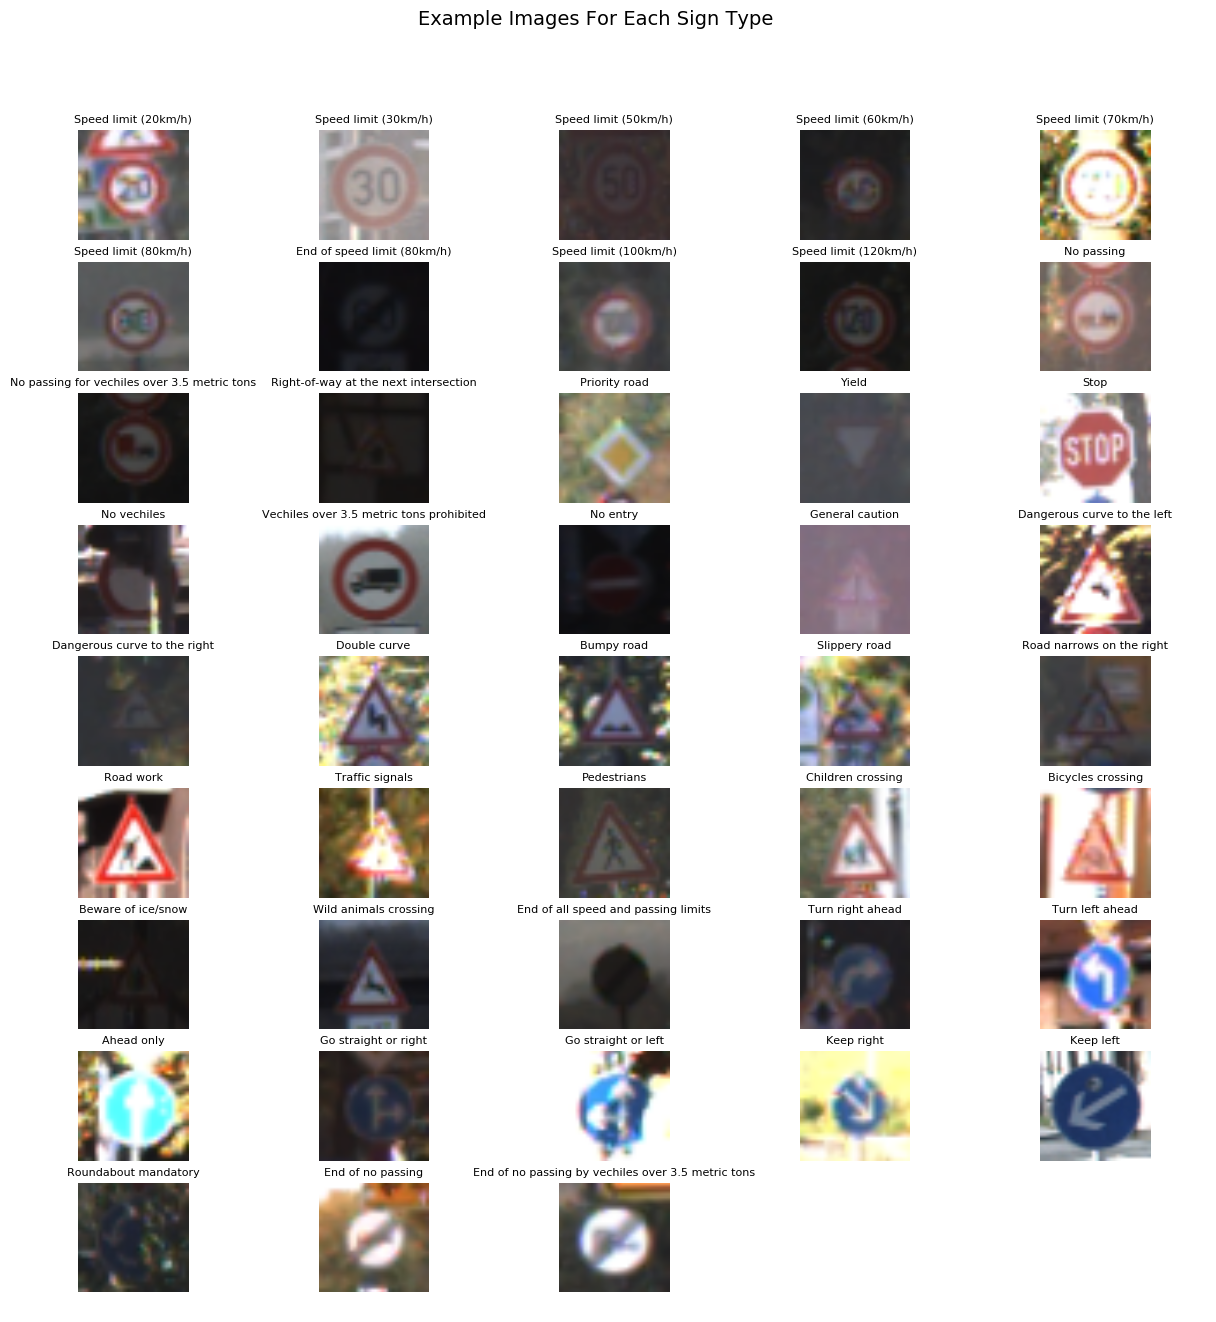

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
data_exploration.plot_signs()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Example LeNet training run
This is an example of my LeNet architecture running for 10 epochs.  The saved training model I'm submitting ran for 1000 epochs.

In [6]:
project_2_lenet.run_lenet(num_epochs=10)

Loading training_file="train.p"
Loading testing_file="test.p"
num_train=37248, num_valid=1961, num_test=12630, num_classes=43
BATCH_SIZE=64, num_epochs=10, training_steps=582, image_shape=1024
Epoch 1: Validation loss=3.2383, Validation accuracy=0.1557
Epoch 2: Validation loss=1.7748, Validation accuracy=0.5260
Epoch 3: Validation loss=1.2788, Validation accuracy=0.6505
Epoch 4: Validation loss=0.9719, Validation accuracy=0.7490
Epoch 5: Validation loss=0.7947, Validation accuracy=0.7917
Epoch 6: Validation loss=0.6806, Validation accuracy=0.8286
Epoch 7: Validation loss=0.5920, Validation accuracy=0.8573
Epoch 8: Validation loss=0.5254, Validation accuracy=0.8766
Epoch 9: Validation loss=0.4732, Validation accuracy=0.8844
Epoch 10: Validation loss=0.4313, Validation accuracy=0.8911
Training Model: 100%|██████████| 10/10 [02:58<00:00, 17.75s/Epoch]
Trained Model Saved.
Test loss=0.9067, Test accuracy=0.8219


### Saved LeNet model
After 1000 epochs, I was able to get test accuracy to 90%.  I think a better implementation of LeNet would yield more accurate results.  Getting the model to work without grayscale or normalization, as well as tweaking parameters like number of epochs and learning rate might get to 99.9% training accuracy, which might get mid-90s test accuracy.

In [1]:
project_2_lenet.run_lenet(save_file="train_model-20161226-051204.ckpt")

Loading training_file="train.p"
Loading testing_file="test.p"
num_train=37248, num_valid=1961, num_test=12630, num_classes=43
BATCH_SIZE=64, num_epochs=1000, training_steps=582, image_shape=1024
Restoring session from train_model-20161226-051204.ckpt
Test loss=3.6520, Test accuracy=0.9006


### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

It took me some time to tease apart the raw pickled data. As a python noob, I learned about this common serialization while examining the array structure for the image data. Using the set() class, I matched classes with example images to visualize the road signs in the training data.
Next I applied a grayscale transform and normalized the min-max scaling for ease of computation.
After that, I applied One-Hot Encoding to the label data and changed the type to float32


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

Since the training and test data were in different files, I used the test data as-is and split the training data into training and validation by using sklearn.model_selection.train_test_split with parameters test_size=0.05 and random_state=832289.  This gave training, validation and test set size of 37248, 1961 and 12630, respectively.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

It was not clear what architecture I should be using or what classifies an architecture so I hope my understanding of it is acceptable.  I’ve seen updated to the course materials that clearly steer us in the direction of the LeNet model, so I’m glad I chose that route.

The first architecture was pieced together from the TensorFlow lab and, from my understanding, does not include any hidden layers.

The second architecture I tried was the LeNet CNN model.  It convolves the neural network shape from 32x32x1 into 5x5x16 by using 4 hidden layers.  Each pass through the hidden layer convolves, computes rectified linear unit and then performs max pooling with ‘valid’ padding.


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

For the first model, I used gradient descent optimizer with a learning rate of 0.001, a batch size of 50 and 100 epochs.

For the second model, I used an Adam optimizer with a default learning rate of 0.001, a batch size of 64 and 1000 epochs.  The max-pooling was with window size [1, 2, 2, 1], a stride of [1, 2, 2, 1] and ‘valid’ padding.  The fully connected number of neurons was 400.


### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

I struggled for weeks on this project, and ultimately coded up several approaches.  I tried two different architectures for the project because the way the session was setup for the original TensorFlow lab was very different for other architectures that I found online.  I felt constrained by jupyter notebook and moved the LeNet CNN model over to PyCharm and worked from there.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [9]:
local_sign_pickler.pickle_local_images()

Appending 20161128_164531-14.bmp with label=14
Appending 20161128_164749-1.bmp with label=1
Appending 20161128_164851-14.bmp with label=14
Appending 20161128_165600-14.bmp with label=14
Appending 20161223_165839-35.bmp with label=35
Appending 20161223_170038-38.bmp with label=38
Appending 20161223_170152-39.bmp with label=39
Appending 20161223_170152a-27.bmp with label=27
Appending 20161223_170152b-27.bmp with label=27
Appending 20161223_170413-15.bmp with label=15
Appending 20161223_170633-38.bmp with label=38
Appending 20161223_170724-14.bmp with label=14
Appending 20161223_170738-15.bmp with label=15
Appending 20161223_171049-16.bmp with label=16
Appending 20161224_122443-37.bmp with label=37
Appending 20161224_123329-13.bmp with label=13
Appending 20161224_123329-27.bmp with label=27
Appending 20161224_123420-16.bmp with label=16
Appending 20161224_133551_HDR-29.bmp with label=29


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

I think classification will be difficult because the local pictures don’t match the German signs exactly.  For instance, the yield signs I captured have the word “Yield” through the center but the German yield signs do not (they look the same otherwise).

Loading training_file="local_test.p"
Loading testing_file="test.p"


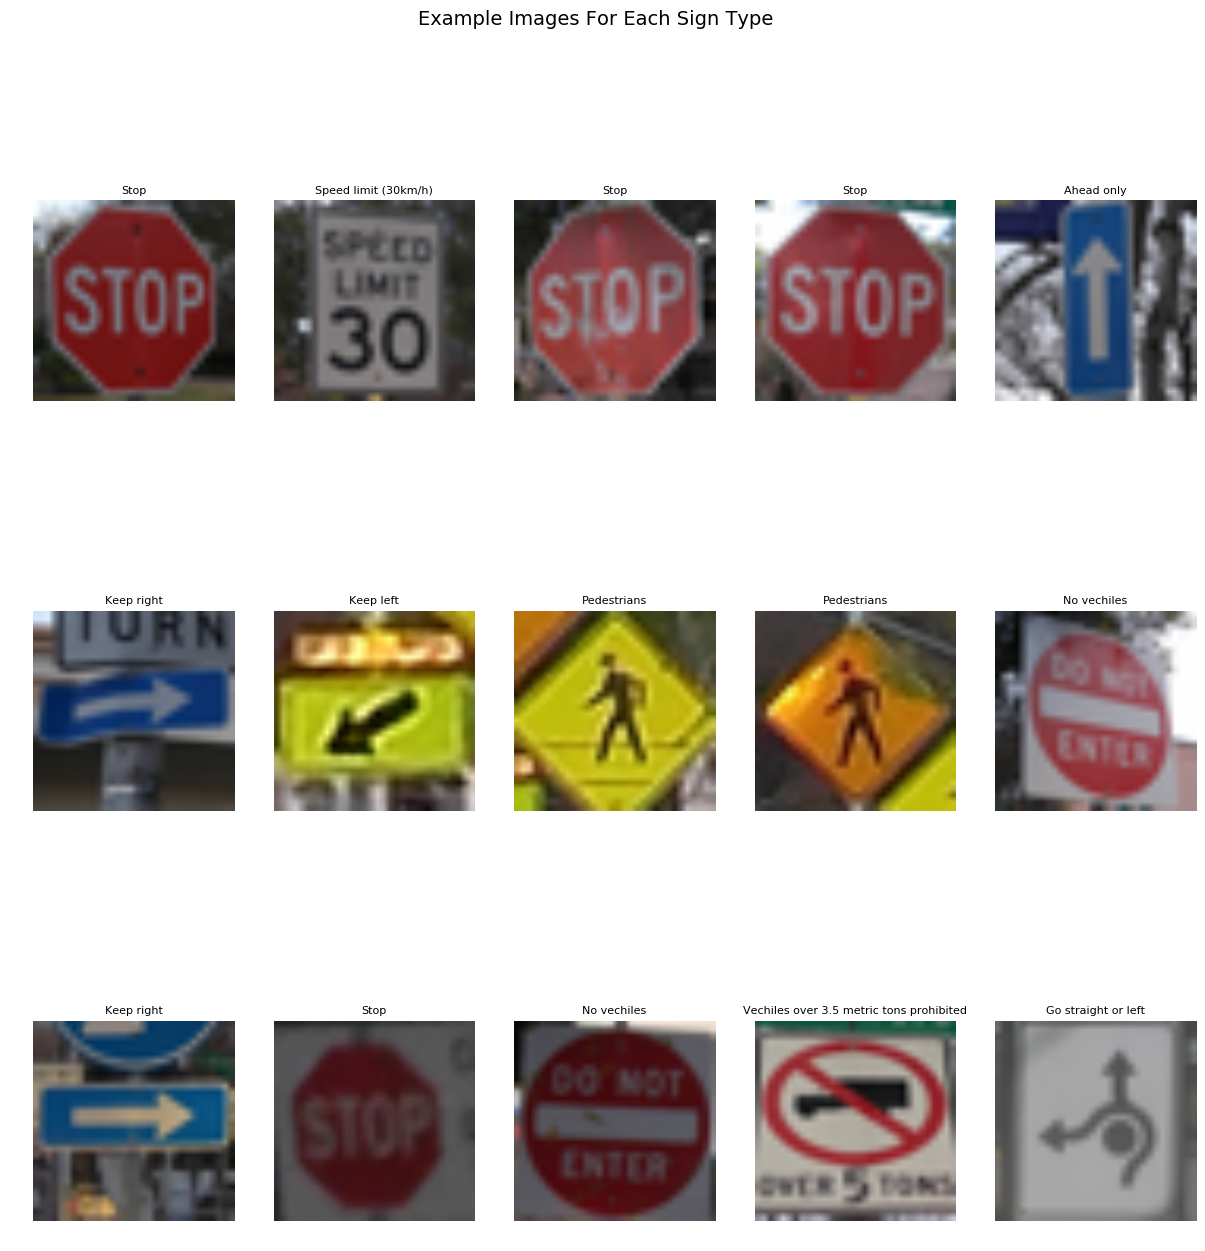

In [7]:
data_exploration.plot_local_signs()

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

My model did not perform equally well on captured pictures.  The accuracy for the LeNet model on the GTSRB test dataset was at 90% but the locally-captured picture accuracy was only 5%.

In [3]:
project_2_lenet.run_lenet(test_file="local_test.p", save_file="train_model-20161226-051204.ckpt")

Loading training_file="train.p"
Loading testing_file="local_test.p"
num_train=37248, num_valid=1961, num_test=19, num_classes=43
BATCH_SIZE=64, num_epochs=1000, training_steps=1, image_shape=1024
Restoring session from train_model-20161226-051204.ckpt
Test loss=101.2790, Test accuracy=0.0526


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

I used Photoshop to crop the feature and remove the color profile.  Then I scaled it to 32x32 and export it as a 24-bit BMP file with the class type appended with a dash ‘-‘.  For example, “20161224_123329-13.bmp” is a yield sign.

After adjusting the images with Photoshop, I wrote a tool (local_sign_pickler.py) to read all the BMP files, parse the class at the end and pickle that into a similar dictionary as the GTSRB dataset.  That allowed me to use the same code that trained and tested the GTSRB dataset as the newly-acquired images.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.